In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned_MXvideos_cc50_202101.csv')

In [3]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry', 'likes.mean', 'dislikes.mean', 'comment_count.mean',
       'cateogry_description', 'category_description'],
      dtype='object')

In [4]:
channels = df['channel_title'].unique()

### chanel trend frecuency measurement: 
$q$ -> Channel total number of videos \
$v$ -> Channel total number of views \
$t = v/q$

In [97]:
fs = dict(df['channel_title'].value_counts())
feature = {}
for channel in channels:
    feature[channel] = {
        'q': fs[channel],
        'v': np.nansum(df[df['channel_title'] == channel]['views'])
    }

In [98]:
SEARCHES = 5
keys = []
for _ in range(SEARCHES):
    key = max(feature, key=lambda x: feature[x]['v']/feature[x]['q'])
    keys.append({key : feature[key]})
    del feature[key]

In [95]:
min_trend = []
for trend in keys:
    chan = list(trend.keys())[0]
    min_trend.append((chan, trend[chan]['v']/trend[chan]['q']))

In [99]:
max_trend = []
for trend in keys:
    chan = list(trend.keys())[0]
    max_trend.append((chan, trend[chan]['v']/trend[chan]['q']))

In [100]:
max_trend

[('YouTube Spotlight', 36467614.85714286),
 ('amazon', 34448035.0),
 ('Kylie Jenner', 32518567.666666668),
 ('Marvel Entertainment', 20160948.736842107),
 ('ibighit', 19343545.153846152)]

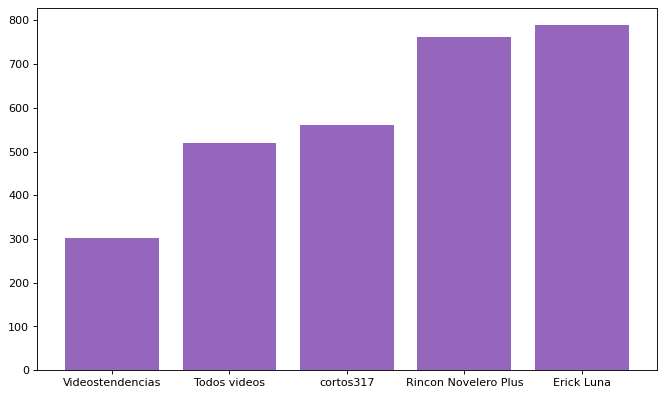

In [112]:
data = min_trend
ind = []
fre = []
plt.figure(figsize=(10, 6), dpi=80)
for item in data: 
    ind.append(item[0])
    fre.append(item[1]) 
    plt.bar(ind, fre) 
plt.show()
